# Machine learning Algorithms I
## 5 Decision Trees & Random Forests

In this notebook, we will implement a random forest in Python. We'll start with a single decision tree and a simple problem, and then work our way to a random forest. Once we understand how a single decision tree works, we can transfer this knowledge to an entire forest of trees.

> really nice introduction: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=528s

#### RF Tutorial Aims:
* Random Forest classification with scikit-learn
* How random forests work
* How to use them for regression
* How to evaluate their performance


## 1. Decision Trees

### What is a decision tree


<div>
<img src="5_RF_figures/Decisiontree.png" width="400"/>
</div>

A simple linear classifier will not be able to draw a boundary that separates the classes. The single decision tree will be able to completely separate the points because it essentially draws many repeated linear boundaries between points. A decision tree is a non-parametric model because the number of parameters grows with the size of the data.

* DTs are easy to built, use and interpret **BUT** they are limited!
* Their main disadvantage: INACCURAY! --> are not flexible with new samples

### Exercise - How to built a DT from scratch


First, a decision tree is to be generated by hand from the following admittedly rather artificial data set. 
 
| Clouds | Temperature | Rain | 
| :-: | :-: | :-: |
| yes   | mild       | yes   |
| no | mild       | no |
| yes   | cold       | no |
| no   | cold       | no |
| no | hot       | no |
| no | mild       | no |
| yes   | hot       | yes   | 


The tree should give us the answer as to whether it is raining or not - so "rain" should close the tree as the leaf node. The first step is to determine whether "clouds" or "temperature" is a better choice for the first decision level, i.e. the root node of the tree.

Gini impurity is used for this decision:

\begin{eqnarray*}
Gini(D) = 1 - \sum_{i=1}^k p_i^2.
\end{eqnarray*}

The running index "i" $\in$ [1,2] describes the target classes of the leaf nodes to be distinguished, in this case [rain-yes,rain-no]. The probability $p_1$ or $p_2$ is therefore the probability of rain or no rain in data set D.

The total gini-impurity of a node which splits data set D with $n$ entries into e.g. 2 sub-data sets $D_a$ and $D_b$ with $n_a$ and $n_b$ entries respectively, is calculated from the weighted average of the respective individual gini-impurities:

\begin{eqnarray*}
Gini(D) = \frac{n_a}{n} Gini(D_a) + \frac{n_b}{n} Gini(D_b),
\end{eqnarray*}

where the indices $a$ and $b$ could stand for clouds=yes and clouds=no, for example.


In [1]:
def gini(p1,p2):
    GI = 1 - (p1**2 + p2**2)
    return GI


We now calculate the total gini-impurity of each of the following possible root nodes:

Clouds $=$ yes or no  
Temperature $=$ cold, mild or hot


In [2]:
## 1. cloud no
## results in: rain no --> 4 times, rain yes --> 0 times
p1 = 0/4 # rain no
p2 = 4/4 # rain yes

gini(p1,p2)

0.0

In [3]:
## 2. cloud yes
## results in: rain no --> 1 times, rain yes --> 2 times

p1 = 2/3 # rain yes
p2 = 1/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [4]:
## Calculating total GINI Impurity for the node "clouds"

na = 4 # total entries of clouds no
nb = 3 # total entries of clouds yes

p1a = 0/4 # cloud no, rain no
p2a = 4/4 # cloud no, rain yes

p1b = 2/3 # cloud yes, rain yes
p2b = 1/3 # cloud yes, rain no 


def total_gini(p1a,p2a,p1b,p2b,na, nb):
    GI = na/(na+nb) * gini(p1a,p2a) + nb/(na+nb) * gini(p1b,p2b)
    return GI

total_gini(p1a,p2a,p1b,p2b,na, nb)



0.19047619047619047

##### Calculating total GINI Impurity for the node "temperature"

In [5]:
## 1. temperature cold 
## results in: rain no --> 2 times, rain yes --> 0 times

p1 = 0/2 # rain yes
p2 = 2/2 # rain no 

gini(p1,p2)

0.0

In [6]:
## 2. temperature mild 
## results in: rain no --> 2 times, rain yes --> 1 times

p1 = 1/3 # rain yes
p2 = 2/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [7]:
## 2. temperature hot 
## results in: rain no --> 1 times, rain yes --> 1 times

p1 = 1/2 # rain yes
p2 = 1/2 # rain no 

gini(p1,p2)

0.5

The node with the lowest total Gini impurity is suitable as the first decision node or root node of the tree.
Now determine the total Gini impurity for the first internal nodes of the 2 remaining discriminators, namely for the 2 branches of the root node.


Here we quickly build and train a single decision tree on the data using Scikit-Learn. The tree will learn how to separate the points, building a flowchart of questions based on the feature values and the labels. At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity. 

We'll use the default hyperparameters for the decision tree which means it can grow as deep as necessary in order to completely separate the classes. This will lead to overfitting because the model memorizes the training data, and in practice, we usually want to limit the depth of the tree so it can generalize to testing data.

In [8]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [9]:
# load data

data = {'clouds': [1, 0, 1, 0,0,0,1], 'temp': [10, 20, -3, -5,25,10,30], 'rain': [1, 0, 0, 0,0,0,1]}
df = pd.DataFrame.from_dict(data)
df

,clouds,temp,rain
0,1,10,1
1,0,20,0
2,1,-3,0
3,0,-5,0
4,0,25,0
5,0,10,0
6,1,30,1


In [10]:
#split dataset in features and target variable
feature_cols = ['clouds', 'temp']
X = df[feature_cols] # Features
y = df.rain # Target variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
y

array([1, 0, 0, 0, 0, 0, 1])

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


[Text(0.5, 0.75, 'clouds <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

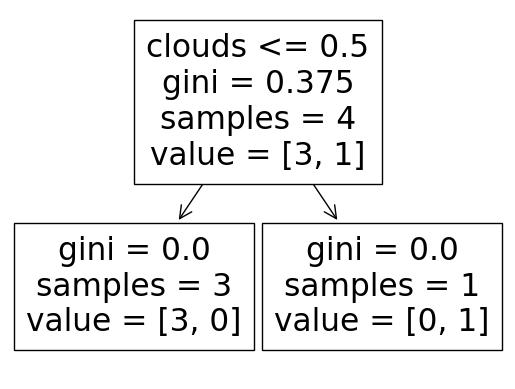

In [15]:
tree.plot_tree(clf, feature_names=feature_cols)

In [16]:
#test_out = {'clouds': [1], 'temp': [10]}
#test_out = pd.DataFrame.from_dict(data)

print(clf.predict([[0,-5]]))

[0]




### 1. What is a RF?

<div>
<img src="5_RF_figures/RF.png" width="500"/>
</div>

* RF are built by combining mulitple DT (ensemble of decision trees to predict target variables)
* RFs combine simplicity of DTs with flexiblity --> therefore improved accuracy
* RFs are for supervised machine learning, where there is a labeled target variable.
* RFs can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
* RFs are an ensemble method, meaning they combine predictions from other models.


#### How does it work?
> A Random forest regression model combines multiple decision trees to create a single model. Each tree in the forest builds from a different subset of the data and makes its own independent prediction. The final prediction for input is based on the average or weighted average of all the individual trees’ predictions.
>
> [Read here more on the theory.](https://www.analytixlabs.co.in/blog/random-forest-regression/#:~:text=using%20various%20techniques.-,Evaluating%20Random%20Forest%20Regression%20Performance,such%20as%20accuracy%20and%20precision.)

<div style="display:flex; align-items: center;padding:70px;">
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*gFYWIpNETvxjYMKBXTh0Qw.jpeg
" width="600"/>
</div>

(figure by [Kohari 2020](https://medium.com/nerd-for-tech/the-ideal-workflow-for-your-machine-learning-project-9df1a7125b17) )


### 3. Packages


In [17]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Modelling
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

### 3. Data set

> aus dem skript der meteos:Aufgabe 2: Random Forests (5 Punkte)

In dieser Übung werden wir einen RF aus aktuellen Berliner Wetterdaten erstellen. Lesen Sie dazu die Datenbeschreibung im Refubium:   https://refubium.fu-berlin.de/handle/fub188/38460

und laden die Datei 01_Tempelhof-1_2006_Daten.zip herunter: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_2006_Daten.zip?sequence=2&isAllowed=y

Zu diesem Datensatz gibt es nochmal eine gesonderte Beschreibung welche Sie sich gern ansehen können: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_Beschreibung.pdf?sequence=3&isAllowed=y

Das Einlesen und Benennen der Daten geht recht einfach (die Variablennamen stehen in der gezipten .csv Datei). In R verwendet man hierfür am besten einen sogenannten Data-Frame. Die Funktion `read.table()` erzeugt diesen automatisch:

In [72]:
variables = ["Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY",
"air_temperature"                            ,"air_temperature_guete",                # C
"relative_humidity"                          ,"relative_humidity_guete",              # %
"duration_of_sunshine"                       ,"duration_of_sunshine_guete",           # min                       
"air_pressure_at_station_level"              ,"air_pressure_at_station_level_guete",  # hPa              
"air_temperature2"                           ,"air_temperature2_guete",                   # C      
"height_of_precipitation"                    ,"height_of_precipitation_guete",            # mm       
"wind_speed_maximum"                         ,"wind_speed_maximum_guete",                 # m/s        
"soil_temperature"                           ,"soil_temperature_guete",                   # C        
"wind_speed_mean"                            ,"wind_speed_mean_guete",                    # m/s       
"global_solar_radiation"                     ,"global_solar_radiation_guete",             # W/m^2        
"air_temperature3"                           ,"air_temperature3_guete",                   # C        
"air_temperature4"                           ,"air_temperature4_guete",                   # C       
"wind_from_direction_at_wind_speed_maximum"  ,"wind_from_direction_at_wind_speed_maximum_guete",  # degree 
"wind_from_direction"                        ,"wind_from_direction_guete"  ]                 # degree

use_var = ["Jahr","Monat","Tag","Stunde","Minute","WoY","DoY","air_temperature",
                    "relative_humidity","duration_of_sunshine","air_pressure_at_station_level",
                    "height_of_precipitation","wind_speed_maximum" ,"soil_temperature" ,"wind_speed_mean" ,
                    "global_solar_radiation", "wind_from_direction_at_wind_speed_maximum","wind_from_direction"]

In [73]:
data = pd.read_csv('data/01_Tempelhof-1_2006_Daten.csv', skiprows = 45, 
                   sep = "\t", index_col=False,
                   names = variables, low_memory=False).reset_index() 
data2use = data.loc[:, use_var] 

In [74]:
data2use.dtypes

Jahr                                           int64
Monat                                          int64
Tag                                            int64
Stunde                                         int64
Minute                                         int64
WoY                                            int64
DoY                                            int64
air_temperature                              float64
relative_humidity                            float64
duration_of_sunshine                         float64
air_pressure_at_station_level                float64
height_of_precipitation                      float64
wind_speed_maximum                           float64
soil_temperature                             float64
wind_speed_mean                              float64
global_solar_radiation                       float64
wind_from_direction_at_wind_speed_maximum    float64
wind_from_direction                          float64
dtype: object

In [75]:
data2use = data2use[data2use['soil_temperature'].notna()]

In [76]:
data2use

,Jahr,Monat,Tag,Stunde,Minute,WoY,DoY,air_temperature,relative_humidity,duration_of_sunshine,air_pressure_at_station_level,height_of_precipitation,wind_speed_maximum,soil_temperature,wind_speed_mean,global_solar_radiation,wind_from_direction_at_wind_speed_maximum,wind_from_direction
0,2006,1,1,0,0,1,1,2.3,99.0,0.0,993.3,0.0,3.5,0.1,3.1,0.0,205.0,211.0
1,2006,1,1,0,1,1,1,2.4,99.0,0.0,993.3,0.0,3.5,0.1,3.0,0.0,213.0,205.0
2,2006,1,1,0,2,1,1,2.3,99.0,0.0,993.3,0.0,4.1,0.1,3.5,0.0,223.0,210.0
3,2006,1,1,0,3,1,1,2.4,99.0,0.0,993.3,0.0,3.7,0.1,3.3,0.0,213.0,213.0
4,2006,1,1,0,4,1,1,2.4,99.0,0.0,993.3,0.0,3.8,0.1,3.2,0.0,223.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2006,12,31,23,55,53,365,7.2,80.0,0.0,1009.5,0.0,6.8,4.6,5.0,0.0,223.0,204.0
525596,2006,12,31,23,56,53,365,7.1,81.0,0.0,1009.5,0.0,5.6,4.6,4.6,0.0,213.0,200.0
525597,2006,12,31,23,57,53,365,7.1,81.0,0.0,1009.5,0.0,6.9,4.6,5.7,0.0,208.0,206.0
525598,2006,12,31,23,58,53,365,7.1,81.0,0.0,1009.5,0.0,6.9,4.6,5.2,0.0,198.0,202.0


### 4. Splitting the data
test and train set

In [22]:
# Split the data into features (X) and target (y)
X = data2use.drop('soil_temperature', axis=1)
y = data2use['soil_temperature']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 5. Fitting and Evaluating the Model

We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [44]:
RegModel = RandomForestRegressor(n_estimators = 150, max_features = 3, random_state = 0, oob_score=True)
#rf.fit(X_train, y_train)

In [40]:
print(rf)

RandomForestRegressor(n_estimators=51)


In [46]:
#Creating the model on Training Data
rf=RegModel.fit(X_train,y_train)

# Predicting the target values of the test set
prediction=rf.predict(X_test)
 


In [54]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, rf.predict(X_train)))



R2 Value: 0.999904066777259
R-squared: 0.9993672364638743


In [55]:
# Evaluating the model
# Measuring Goodness of fit in Test and preditciton data 
## r2
r2 = metrics.r2_score(y_test, prediction)
print(f'R-squared: {r2}')

## mse
mse = metrics.mean_squared_error(y_test, prediction)
print(mse)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, prediction)), '.3f'))
print("\nRMSE: ", rmse)


R-squared: 0.9993672364638743
0.07080380091429625
0.2660898361724781

RMSE:  0.266


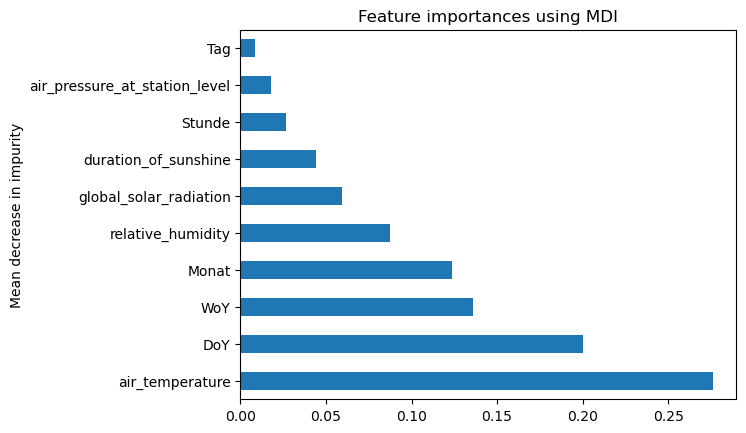

In [61]:
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")

fig.tight_layout()

plt.show()

In [71]:
len(prediction)


105096

In [28]:

# Access the OOB Score
#oob_score = rf.oob_score_
#print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
#predictions = rf.predict(x)
 



Mean Squared Error: 0.07080380091429625
R-squared: 0.9993672364638743


Hence, the Random Forest Regression algorithm is a powerful Machine Learning algorithm that does not require a lot of parameter tuning and is capable of capturing a broader picture of the data. However, the model when applied to larger data sets can become time-consuming and requires large computational powe

In [ ]:

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')

In [66]:
# Dates of training values
months = features[:, X.index('month')]
days = features[:, X.index('day')]
years = features[:, X.index('year')]
# List and then convert to datetime object
#dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
#dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
## Dataframe with true values and dates
#true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

NameError: name 'features' is not defined

In [68]:
#plt.plot(prediction, 'ro', label = 'prediction')
len(prediction)


105096

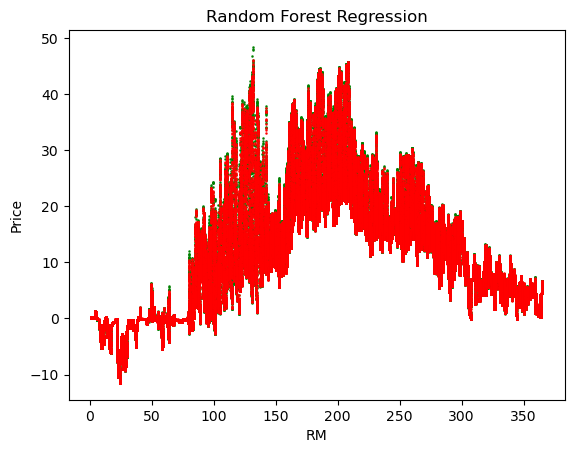

In [98]:
plt.scatter(X_test['DoY'].values, y_test, color = 'green', ls = "-", linewidth=0.3, s=2)
plt.scatter(X_test['DoY'].values, prediction, color = 'red', ls = "-", linewidth=0.3, s=2)
#plt.scatter(X_test['RM'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show() 

In [77]:
X_test

,Jahr,Monat,Tag,Stunde,Minute,WDay,WoY,DoY,air_temperature,relative_humidity,duration_of_sunshine,air_pressure_at_station_level,height_of_precipitation,wind_speed_maximum,wind_speed_mean,global_solar_radiation,wind_from_direction_at_wind_speed_maximum,wind_from_direction
69650,2006,2,18,8,50,6,7,49,4.3,86.0,0.9,992.7,0.0,6.4,5.3,355.0,225.0,224.0
202122,2006,5,21,8,42,0,21,141,12.2,93.0,0.0,994.8,0.0,7.8,6.2,22.0,270.0,272.0
119450,2006,3,24,22,50,5,12,83,3.6,49.0,0.0,1000.1,0.0,4.5,3.0,0.0,140.0,133.0
425168,2006,10,23,6,8,1,43,296,12.9,92.0,0.0,994.3,0.0,4.0,3.4,0.0,190.0,193.0
315611,2006,8,8,4,11,2,32,220,17.2,96.0,0.0,1004.5,0.0,3.0,2.2,0.0,303.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349260,2006,8,31,13,0,4,35,243,18.7,54.0,0.0,1013.3,0.0,8.0,4.4,37.0,275.0,312.0
424800,2006,10,23,0,0,1,43,296,12.6,89.0,0.0,996.9,0.0,4.3,3.5,0.0,173.0,172.0
302848,2006,7,30,7,28,0,31,211,22.3,80.0,1.0,1005.4,0.0,2.8,2.4,402.0,288.0,282.0
42702,2006,1,30,15,42,1,5,30,-0.1,93.0,0.0,1021.6,0.0,3.5,2.9,0.0,278.0,278.0
